In [62]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [63]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [64]:
X_test.shape

(10000, 32, 32, 3)

In [65]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D data and for our classification we need  a 1D data so we need to convert this

In [66]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [67]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [68]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X_train[index])
  plt.xlabel(classes[y[index]])


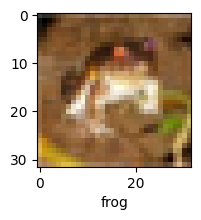

In [69]:
plot_sample(X_train,y_train,0)

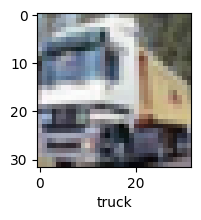

In [70]:
plot_sample(X_train,y_train,1)

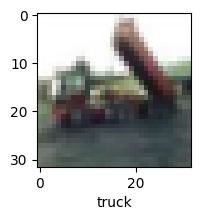

In [71]:
plot_sample(X_train,y_train,2)

Normalize the images to a number from 0 to 1.Images have 3 channels R,G,B and each value in the channel can range from 0 to 255.Hence we normalize in 0=>1 range , we divide it by 255

In [72]:
X_train=X_train/255.0
X_test=X_test/255.0

Model building and training

In [73]:
model=keras.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train,y_train,epochs=5)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 122s 78ms/step - accuracy: 0.3070 - loss: 1.9257
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 77ms/step - accuracy: 0.4224 - loss: 1.6440
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 78ms/step - accuracy: 0.4517 - loss: 1.5568
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 121s 77ms/step - accuracy: 0.4774 - loss: 1.4899
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 148s 81ms/step - accuracy: 0.4995 - loss: 1.4349


In [74]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.4702 - loss: 1.4832


[1.4875106811523438, 0.46459999680519104]

In [75]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=model.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("Classification report: \n",classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
Classification report: 
               precision    recall  f1-score   support

           0       0.69      0.37      0.48      1000
           1       0.59      0.65      0.62      1000
           2       0.37      0.32      0.34      1000
           3       0.34      0.26      0.30      1000
           4       0.53      0.22      0.31      1000
           5       0.34      0.48      0.40      1000
           6       0.37      0.78      0.50      1000
           7       0.70      0.40      0.51      1000
           8       0.49      0.73      0.59      1000
           9       0.61      0.44      0.51      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.45     10000
weighted avg       0.50      0.46      0.45     10000



In [77]:
cnn=model=keras.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax'),#softmax will normalise the probability
])

In [78]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [79]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 36ms/step - accuracy: 0.3391 - loss: 1.7899
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 37ms/step - accuracy: 0.5573 - loss: 1.2484
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 36ms/step - accuracy: 0.6302 - loss: 1.0580
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.6591 - loss: 0.9812
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.6801 - loss: 0.9234
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 37ms/step - accuracy: 0.6992 - loss: 0.8679
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.7110 - loss: 0.8238
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.7285 - loss: 0.7894
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 37ms/step - accuracy: 0.7379 - loss: 0.7508
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 37ms/step - accuracy: 0.7495 - loss: 0.7210


In [82]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6986 - loss: 0.8808


[0.8891413807868958, 0.694599986076355]

In [83]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


array([[1.73533789e-03, 9.05558500e-06, 2.13252218e-03, 9.25565600e-01,
        1.37605632e-04, 5.56348227e-02, 1.83515216e-03, 1.26974424e-04,
        1.27458880e-02, 7.70777333e-05],
       [1.33177813e-03, 9.56986938e-03, 1.65066449e-05, 7.72092335e-07,
        3.88742905e-07, 1.36297915e-08, 9.60577893e-08, 1.03335047e-07,
        9.88785028e-01, 2.95432372e-04],
       [2.39650995e-01, 9.85932276e-02, 1.13094663e-02, 3.51138338e-02,
        1.55748497e-03, 1.09726598e-03, 3.87294713e-04, 3.67264752e-03,
        5.62168360e-01, 4.64493446e-02],
       [5.52888215e-01, 4.49984521e-02, 2.65722140e-03, 1.92493442e-02,
        1.10385404e-03, 3.16759775e-04, 5.23623778e-04, 2.38159173e-05,
        3.77957344e-01, 2.81275716e-04],
       [2.33128230e-05, 5.99089180e-05, 1.04904957e-02, 2.70290133e-02,
        1.90670177e-01, 1.68099988e-03, 7.69028723e-01, 5.67220850e-05,
        9.19151993e-04, 4.15087779e-05]], dtype=float32)

In [84]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(6)]

In [86]:
y_test=y_test.reshape((-1,))
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

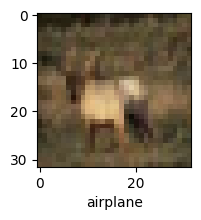

In [87]:
plot_sample(X_test,y_test,3)

In [92]:
classes[y_classes[3]]

'airplane'

In [93]:
print("Classification report: \n",classification_report(y_test,y_classes))

Classification report: 
               precision    recall  f1-score   support

           0       0.73      0.70      0.72      1000
           1       0.87      0.72      0.79      1000
           2       0.59      0.61      0.60      1000
           3       0.50      0.54      0.52      1000
           4       0.76      0.53      0.62      1000
           5       0.61      0.63      0.62      1000
           6       0.79      0.74      0.76      1000
           7       0.70      0.82      0.75      1000
           8       0.77      0.82      0.79      1000
           9       0.71      0.84      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

